# Tree-level completions of dimension-six SMEFT operators

## Generating the operator set

We want to generate an overcomplete set of operators to pass into our algorithm. Since we explicitely don't want to account for redundancies from IBP and field redefinitions through EOM, this is a relatively simple task.

In [1]:
from neutrinomass.tensormethod import D, eps, delta, invariants, colour_singlets
from neutrinomass.tensormethod.sm import L, H, Q, db, ub, eb
from neutrinomass.completions import operator_completions, deriv_operator_completions, collect_models, EffectiveOperator
from neutrinomass.completions.completions import derivative_combinations
from neutrinomass.utils import remove_equivalent

from collections import defaultdict
from IPython.display import display

We define an auxiliary function to find the invariants and call it on the field content of each of the operators. Some of the invariants may be equivalent up to index relabellings, but this will be clear when we come to match these onto the Warsaw basis.

In [2]:
def sm_singlets(*fields):
    su2_singlets = invariants(*fields, ignore=("u", "d", "c"))
    return colour_singlets(su2_singlets, overcomplete=True)

In [3]:
OPERATORS = {
    "O5": sm_singlets(L, L, H, H),
    "Oll": sm_singlets(L, L, L.conj, L.conj),
    "Oqq": sm_singlets(Q.conj, Q, Q.conj, Q),
    "Olq": sm_singlets(L, Q, L.conj, Q.conj),
    "Oee": sm_singlets(eb, eb, eb.conj, eb.conj),
    "Ouu": sm_singlets(ub, ub, ub.conj, ub.conj),
    "Odd": sm_singlets(db, db, db.conj, db.conj),
    "Oud": sm_singlets(ub, ub.conj, db, db.conj),
    "Oeu": sm_singlets(ub, ub.conj, eb, eb.conj),
    "Oed": sm_singlets(db, db.conj, eb, eb.conj),
    "Ole": sm_singlets(L, L.conj, eb, eb.conj),
    "Oqe": sm_singlets(Q, Q.conj, eb, eb.conj),
    "Olu": sm_singlets(L, L.conj, ub, ub.conj),
    "Old": sm_singlets(L, L.conj, db, db.conj),
    "Oqu": sm_singlets(Q, Q.conj, ub, ub.conj),
    "Oqd": sm_singlets(Q, Q.conj, db, db.conj),
    "Oledq": sm_singlets(L.conj, eb.conj, db, Q),
    "Oquqd": sm_singlets(Q, ub, Q, db),
    "Olequ": sm_singlets(L, eb, Q, ub),
    "Ophi6": sm_singlets(H, H, H, H.conj, H.conj, H.conj),
    "Oephi": sm_singlets(L, eb, H, H.conj, H.conj),
    "Ouphi": sm_singlets(Q, ub, H, H, H.conj),
    "Odphi": sm_singlets(Q, db, H, H.conj, H.conj),
    # ... Baryon number violating
}

_deriv_operators = {
    "OphiD": sm_singlets(D(H, "11"), D(H, "11"), H.conj, H.conj), # stands in for OphiBox as well
    "Ophil": sm_singlets(D(H, "11"), H.conj, L.conj, L),
    "Ophie": sm_singlets(D(H, "11"), H.conj, eb.conj, eb),
    "Ophiq": sm_singlets(D(H, "11"), H.conj, Q.conj, Q),
    "Ophiu": sm_singlets(D(H, "11"), H.conj, ub.conj, ub),
    "Ophid": sm_singlets(D(H, "11"), H.conj, db.conj, db),
    "Ophiud": sm_singlets(D(H, "11"), H, db, ub.conj),
}

DERIV_OPERATORS = defaultdict(list)
for op_label, ops in _deriv_operators.items():
    for op in ops:
        for deriv_pos in derivative_combinations(op):
            DERIV_OPERATORS[op_label].append(deriv_pos)

## Exploding the operators

### Non-derivative operators

Below, we find the completions and print them out nicely. We also save them to a dictionary called `COMPLETIONS` which maps the operator label in the `OPERATORS` dictionary to another dictionary which maps an integer counting the different singlets to the models that generate that singlet operator.

The fields are printed with a character, either S or F distinguishing a scalar or fermion, then a 3-tuple containing the transformation properties under the SM gauge group, and finally $3B$ (three times the baryon number) in parentheses on the end.

In [4]:
%%time

# Takes about 2 minutes to run
COMPLETIONS = {k: {} for k, _ in OPERATORS.items()}
for label, op_list in OPERATORS.items():
    for i, op in enumerate(op_list):
        print(f"Completions of {label}_{i}")
        display(op)
        
        # The `operator_completions` function wants an EffectiveOperator object
        eff_op = EffectiveOperator(label, op)
        # Find completions and cast to list
        comps = list(operator_completions(eff_op))
        # Collect models by particle content
        models = collect_models(comps)
        
        model_fields = ["+".join(f for f in m.exotic_numbers) for m in models]
        print("; ".join(model_fields))
        print("\n")
        
        COMPLETIONS[label][i] = models

Completions of O5_0


L(u0_, I_0, g0_)*L(u1_, I_1, g1_)*H(I_2)*H(I_3)*metric(-I_0, -I_2)*metric(-I_3, -I_1)

S(1, 3, 1)(0); F(1, 1, 0)(0); F(1, 3, 0)(0)


Completions of Oll_0


L(u4_, I_0, g4_)*L(u5_, I_1, g5_)*L†(d0_, I_2, g6_)*L†(d1_, I_3, g7_)*metric(-I_0, -I_2)*metric(-I_3, -I_1)

S(1, 3, 1)(0)


Completions of Oll_1


L(u6_, I_0, g9_)*L(u7_, I_1, g10_)*L†(d3_, I_2, g11_)*L†(d4_, I_3, g12_)*metric(-I_1, -I_0)*metric(-I_3, -I_2)

S(1, 1, 1)(0)


Completions of Oqq_0


Q†(d5_, -C_2, I_0, g13_)*Q(u8_, C_0, I_1, g14_)*Q†(d6_, -C_3, I_2, g15_)*Q(u9_, C_1, I_3, g16_)*metric(-I_0, -I_2)*metric(-I_3, -I_1)*KD(C_2, -C_0)*KD(C_3, -C_1)

S(6, 1, 1/3)(2)


Completions of Oqq_1


Q†(d5_, -C_2, I_0, g13_)*Q(u8_, C_0, I_1, g14_)*Q†(d6_, -C_3, I_2, g15_)*Q(u9_, C_1, I_3, g16_)*metric(-I_0, -I_2)*metric(-I_3, -I_1)*KD(C_2, -C_1)*KD(C_3, -C_0)

S(6, 1, 1/3)(2)


Completions of Oqq_2


Q†(d5_, -C_2, I_0, g13_)*Q(u8_, C_0, I_1, g14_)*Q†(d6_, -C_3, I_2, g15_)*Q(u9_, C_1, I_3, g16_)*metric(-I_0, -I_2)*metric(-I_3, -I_1)*Eps(C_2, C_3, C_4)*Eps(-C_1, -C_0, -C_4)

S(3b, 1, 1/3)(2)


Completions of Oqq_3


Q†(d5_, -C_2, I_0, g13_)*Q(u8_, C_0, I_1, g14_)*Q†(d6_, -C_3, I_2, g15_)*Q(u10_, C_1, I_3, g17_)*metric(-I_1, -I_2)*metric(-I_3, -I_0)*KD(C_2, -C_0)*KD(C_3, -C_1)

S(6, 3, 1/3)(2)


Completions of Oqq_4


Q†(d5_, -C_2, I_0, g13_)*Q(u8_, C_0, I_1, g14_)*Q†(d6_, -C_3, I_2, g15_)*Q(u10_, C_1, I_3, g17_)*metric(-I_1, -I_2)*metric(-I_3, -I_0)*KD(C_2, -C_1)*KD(C_3, -C_0)

S(6, 3, 1/3)(2)


Completions of Oqq_5


Q†(d5_, -C_2, I_0, g13_)*Q(u8_, C_0, I_1, g14_)*Q†(d6_, -C_3, I_2, g15_)*Q(u10_, C_1, I_3, g17_)*metric(-I_1, -I_2)*metric(-I_3, -I_0)*Eps(C_2, C_3, C_4)*Eps(-C_1, -C_0, -C_4)

S(3b, 3, 1/3)(2)


Completions of Oqq_6


Q†(d7_, -C_2, I_0, g18_)*Q(u11_, C_0, I_1, g19_)*Q†(d8_, -C_3, I_2, g20_)*Q(u12_, C_1, I_3, g21_)*metric(-I_1, -I_0)*metric(-I_3, -I_2)*KD(C_2, -C_0)*KD(C_3, -C_1)

S(6, 3, 1/3)(2)


Completions of Oqq_7


Q†(d7_, -C_2, I_0, g18_)*Q(u11_, C_0, I_1, g19_)*Q†(d8_, -C_3, I_2, g20_)*Q(u12_, C_1, I_3, g21_)*metric(-I_1, -I_0)*metric(-I_3, -I_2)*KD(C_2, -C_1)*KD(C_3, -C_0)

S(6, 3, 1/3)(2)


Completions of Oqq_8


Q†(d7_, -C_2, I_0, g18_)*Q(u11_, C_0, I_1, g19_)*Q†(d8_, -C_3, I_2, g20_)*Q(u12_, C_1, I_3, g21_)*metric(-I_1, -I_0)*metric(-I_3, -I_2)*Eps(C_2, C_3, C_4)*Eps(-C_1, -C_0, -C_4)

S(3b, 3, 1/3)(2)


Completions of Olq_0


L(u18_, I_0, g31_)*Q(u19_, C_0, I_1, g32_)*L†(d13_, I_2, g33_)*Q†(d14_, -C_1, I_3, g34_)*metric(-I_0, -I_2)*metric(-I_3, -I_1)*KD(C_1, -C_0)

S(3b, 3, 1/3)(-1)


Completions of Olq_1


L(u18_, I_0, g31_)*Q(u19_, C_0, I_1, g32_)*L†(d13_, I_2, g33_)*Q†(d15_, -C_1, I_3, g35_)*metric(-I_1, -I_2)*metric(-I_3, -I_0)*KD(C_1, -C_0)

S(3b, 3, 1/3)(-1)


Completions of Olq_2


L(u20_, I_0, g36_)*Q(u21_, C_0, I_1, g37_)*L†(d16_, I_2, g38_)*Q†(d17_, -C_1, I_3, g39_)*metric(-I_1, -I_0)*metric(-I_3, -I_2)*KD(C_1, -C_0)

S(3b, 1, 1/3)(-1)


Completions of Oee_0


eb(u22_, g40_)*eb(u23_, g41_)*eb†(d18_, g42_)*eb†(d19_, g43_)

S(1, 1, 2)(0)


Completions of Ouu_0


ub(u24_, -C_2, g44_)*ub(u25_, -C_3, g45_)*ub†(d20_, C_0, g46_)*ub†(d21_, C_1, g47_)*KD(C_2, -C_0)*KD(C_3, -C_1)

S(6, 1, 4/3)(2)


Completions of Ouu_1


ub(u24_, -C_2, g44_)*ub(u25_, -C_3, g45_)*ub†(d20_, C_0, g46_)*ub†(d21_, C_1, g47_)*KD(C_2, -C_1)*KD(C_3, -C_0)

S(6, 1, 4/3)(2)


Completions of Ouu_2


ub(u24_, -C_2, g44_)*ub(u25_, -C_3, g45_)*ub†(d20_, C_0, g46_)*ub†(d21_, C_1, g47_)*Eps(C_2, C_3, C_4)*Eps(-C_1, -C_0, -C_4)

S(3b, 1, 4/3)(2)


Completions of Odd_0


db(u28_, -C_2, g52_)*db(u29_, -C_3, g53_)*db†(d24_, C_0, g54_)*db†(d25_, C_1, g55_)*KD(C_2, -C_0)*KD(C_3, -C_1)

S(6b, 1, 2/3)(-2)


Completions of Odd_1


db(u28_, -C_2, g52_)*db(u29_, -C_3, g53_)*db†(d24_, C_0, g54_)*db†(d25_, C_1, g55_)*KD(C_2, -C_1)*KD(C_3, -C_0)

S(6b, 1, 2/3)(-2)


Completions of Odd_2


db(u28_, -C_2, g52_)*db(u29_, -C_3, g53_)*db†(d24_, C_0, g54_)*db†(d25_, C_1, g55_)*Eps(C_2, C_3, C_4)*Eps(-C_1, -C_0, -C_4)

S(3, 1, 2/3)(-2)


Completions of Oud_0


ub(u32_, -C_2, g60_)*ub†(d28_, C_0, g61_)*db(u33_, -C_3, g62_)*db†(d29_, C_1, g63_)*KD(C_2, -C_0)*KD(C_3, -C_1)

S(6, 1, 1/3)(2)


Completions of Oud_1


ub(u32_, -C_2, g60_)*ub†(d28_, C_0, g61_)*db(u33_, -C_3, g62_)*db†(d29_, C_1, g63_)*KD(C_2, -C_1)*KD(C_3, -C_0)

S(6, 1, 1/3)(2)


Completions of Oud_2


ub(u32_, -C_2, g60_)*ub†(d28_, C_0, g61_)*db(u33_, -C_3, g62_)*db†(d29_, C_1, g63_)*Eps(C_2, C_3, C_4)*Eps(-C_1, -C_0, -C_4)

S(3b, 1, 1/3)(2)


Completions of Oeu_0


ub(u36_, -C_1, g68_)*ub†(d32_, C_0, g69_)*eb(u37_, g70_)*eb†(d33_, g71_)*KD(C_1, -C_0)

S(3b, 1, 1/3)(-1)


Completions of Oed_0


db(u38_, -C_1, g72_)*db†(d34_, C_0, g73_)*eb(u39_, g74_)*eb†(d35_, g75_)*KD(C_1, -C_0)

S(3b, 1, 4/3)(-1)


Completions of Ole_0


L(u40_, I_0, g76_)*L†(d36_, I_1, g77_)*eb(u41_, g78_)*eb†(d37_, g79_)*metric(-I_1, -I_0)

S(1, 2, 1/2)(0)


Completions of Oqe_0


Q(u42_, C_0, I_0, g80_)*Q†(d38_, -C_1, I_1, g81_)*eb(u43_, g82_)*eb†(d39_, g83_)*metric(-I_1, -I_0)*KD(C_1, -C_0)

S(3, 2, 7/6)(1)


Completions of Olu_0


L(u44_, I_0, g84_)*L†(d40_, I_1, g85_)*ub(u45_, -C_1, g86_)*ub†(d41_, C_0, g87_)*metric(-I_1, -I_0)*KD(C_1, -C_0)

S(3, 2, 7/6)(1)


Completions of Old_0


L(u46_, I_0, g88_)*L†(d42_, I_1, g89_)*db(u47_, -C_1, g90_)*db†(d43_, C_0, g91_)*metric(-I_1, -I_0)*KD(C_1, -C_0)

S(3, 2, 1/6)(1)


Completions of Oqu_0


Q(u48_, C_0, I_0, g92_)*Q†(d44_, -C_2, I_1, g93_)*ub(u49_, -C_3, g94_)*ub†(d45_, C_1, g95_)*metric(-I_1, -I_0)*KD(C_2, -C_0)*KD(C_3, -C_1)

S(8, 2, 1/2)(0)


Completions of Oqu_1


Q(u48_, C_0, I_0, g92_)*Q†(d44_, -C_2, I_1, g93_)*ub(u49_, -C_3, g94_)*ub†(d45_, C_1, g95_)*metric(-I_1, -I_0)*KD(C_2, -C_1)*KD(C_3, -C_0)

S(1, 2, 1/2)(0)


Completions of Oqu_2


Q(u48_, C_0, I_0, g92_)*Q†(d44_, -C_2, I_1, g93_)*ub(u49_, -C_3, g94_)*ub†(d45_, C_1, g95_)*metric(-I_1, -I_0)*Eps(C_2, C_3, C_4)*Eps(-C_1, -C_0, -C_4)

S(8, 2, 1/2)(0)


Completions of Oqd_0


Q(u52_, C_0, I_0, g100_)*Q†(d48_, -C_2, I_1, g101_)*db(u53_, -C_3, g102_)*db†(d49_, C_1, g103_)*metric(-I_1, -I_0)*KD(C_2, -C_0)*KD(C_3, -C_1)

S(8, 2, 1/2)(0)


Completions of Oqd_1


Q(u52_, C_0, I_0, g100_)*Q†(d48_, -C_2, I_1, g101_)*db(u53_, -C_3, g102_)*db†(d49_, C_1, g103_)*metric(-I_1, -I_0)*KD(C_2, -C_1)*KD(C_3, -C_0)

S(1, 2, 1/2)(0)


Completions of Oqd_2


Q(u52_, C_0, I_0, g100_)*Q†(d48_, -C_2, I_1, g101_)*db(u53_, -C_3, g102_)*db†(d49_, C_1, g103_)*metric(-I_1, -I_0)*Eps(C_2, C_3, C_4)*Eps(-C_1, -C_0, -C_4)

S(8, 2, 1/2)(0)


Completions of Oledq_0


L†(d52_, I_0, g108_)*eb†(d53_, g109_)*db(u56_, -C_1, g110_)*Q(u57_, C_0, I_1, g111_)*metric(-I_1, -I_0)*KD(C_1, -C_0)

S(1, 2, 1/2)(0)


Completions of Oquqd_0


Q(u58_, C_0, I_0, g112_)*ub(u59_, -C_2, g113_)*Q(u60_, C_1, I_1, g114_)*db(u61_, -C_3, g115_)*metric(-I_1, -I_0)*KD(C_2, -C_0)*KD(C_3, -C_1)

S(1, 2, 1/2)(0); S(8, 2, 1/2)(0); S(6, 1, 1/3)(2)


Completions of Oquqd_1


Q(u58_, C_0, I_0, g112_)*ub(u59_, -C_2, g113_)*Q(u60_, C_1, I_1, g114_)*db(u61_, -C_3, g115_)*metric(-I_1, -I_0)*KD(C_2, -C_1)*KD(C_3, -C_0)

S(8, 2, 1/2)(0); S(1, 2, 1/2)(0); S(6, 1, 1/3)(2)


Completions of Oquqd_2


Q(u58_, C_0, I_0, g112_)*ub(u59_, -C_2, g113_)*Q(u60_, C_1, I_1, g114_)*db(u61_, -C_3, g115_)*metric(-I_1, -I_0)*Eps(C_2, C_3, C_4)*Eps(-C_1, -C_0, -C_4)

S(8, 2, 1/2)(0); S(3b, 1, 1/3)(2)


Completions of Olequ_0


L(u74_, I_0, g128_)*eb(u75_, g129_)*Q(u76_, C_0, I_1, g130_)*ub(u77_, -C_1, g131_)*metric(-I_1, -I_0)*KD(C_1, -C_0)

S(1, 2, 1/2)(0); S(3, 2, 7/6)(1); S(3b, 1, 1/3)(-1)


Completions of Ophi6_0


H(I_0)*H(I_1)*H(I_2)*H†(I_3)*H†(I_4)*H†(I_5)*metric(-I_0, -I_3)*metric(-I_1, -I_4)*metric(-I_5, -I_2)

S(1, 2, 1/2)(0); S(1, 4, 1/2)(0); S(1, 4, 3/2)(0); S(1, 1, 0)(0)+S(1, 3, 1)(0); S(1, 3, 1)(0); S(1, 1, 0)(0)+S(1, 3, 0)(0); S(1, 1, 0)(0); S(1, 3, 0)(0)+S(1, 3, 1)(0); S(1, 3, 0)(0); S(1, 3, 1)(0)+S(1, 4, 1/2)(0); S(1, 3, 0)(0)+S(1, 4, 1/2)(0); S(1, 2, 1/2)(0)+S(1, 3, 0)(0); S(1, 3, 1)(0)+S(1, 4, 3/2)(0); S(1, 2, 1/2)(0)+S(1, 3, 1)(0); S(1, 1, 0)(0)+S(1, 2, 1/2)(0); S(1, 3, 0)(0)+S(1, 3, 1)(0)+S(1, 4, 1/2)(0); S(1, 1, 0)(0)+S(1, 2, 1/2)(0)+S(1, 3, 1)(0); S(1, 2, 1/2)(0)+S(1, 3, 0)(0)+S(1, 3, 1)(0); S(1, 1, 0)(0)+S(1, 2, 1/2)(0)+S(1, 3, 0)(0)


Completions of Oephi_0


L(u82_, I_0, g136_)*eb(u83_, g137_)*H(I_1)*H†(I_2)*H†(I_3)*metric(-I_0, -I_2)*metric(-I_3, -I_1)

S(1, 2, 1/2)(0); S(1, 2, 1/2)(0)+S(1, 3, 1)(0); S(1, 2, 1/2)(0)+S(1, 3, 0)(0); S(1, 1, 0)(0)+S(1, 2, 1/2)(0); F(1, 2, 1/2)(0)+F(1, 3, 0)(0); F(1, 2, 1/2)(0)+F(1, 3, 1)(0); F(1, 1, 1)(0)+F(1, 2, 1/2)(0); F(1, 2, 3/2)(0)+F(1, 3, 1)(0); F(1, 1, 1)(0)+F(1, 2, 3/2)(0); F(1, 2, 3/2)(0)+S(1, 3, 1)(0); F(1, 2, 1/2)(0)+S(1, 3, 0)(0); F(1, 2, 1/2)(0)+S(1, 1, 0)(0); F(1, 3, 1)(0)+S(1, 3, 0)(0); F(1, 1, 1)(0)+S(1, 1, 0)(0); F(1, 3, 0)(0)+S(1, 3, 1)(0)


Completions of Ouphi_0


Q(u86_, C_0, I_0, g140_)*ub(u87_, -C_1, g141_)*H(I_1)*H(I_2)*H†(I_3)*metric(-I_0, -I_2)*metric(-I_3, -I_1)*KD(C_1, -C_0)

S(1, 2, 1/2)(0); S(1, 2, 1/2)(0)+S(1, 3, 1)(0); S(1, 2, 1/2)(0)+S(1, 3, 0)(0); S(1, 1, 0)(0)+S(1, 2, 1/2)(0); F(3, 2, 1/6)(1)+F(3b, 3, 1/3)(-1); F(3, 2, 1/6)(1)+F(3, 3, 2/3)(1); F(3, 1, 2/3)(1)+F(3, 2, 7/6)(1); F(3, 2, 7/6)(1)+F(3, 3, 2/3)(1); F(3, 1, 2/3)(1)+F(3, 2, 1/6)(1); F(3, 2, 7/6)(1)+S(1, 3, 1)(0); F(3, 2, 1/6)(1)+S(1, 3, 0)(0); F(3, 3, 2/3)(1)+S(1, 3, 0)(0); F(3, 2, 1/6)(1)+S(1, 1, 0)(0); F(3b, 3, 1/3)(-1)+S(1, 3, 1)(0); F(3, 1, 2/3)(1)+S(1, 1, 0)(0)


Completions of Odphi_0


Q(u90_, C_0, I_0, g144_)*db(u91_, -C_1, g145_)*H(I_1)*H†(I_2)*H†(I_3)*metric(-I_0, -I_2)*metric(-I_3, -I_1)*KD(C_1, -C_0)

S(1, 2, 1/2)(0); S(1, 2, 1/2)(0)+S(1, 3, 1)(0); S(1, 2, 1/2)(0)+S(1, 3, 0)(0); S(1, 1, 0)(0)+S(1, 2, 1/2)(0); F(3, 2, 1/6)(1)+F(3, 3, 2/3)(1); F(3b, 2, 5/6)(-1)+F(3b, 3, 1/3)(-1); F(3, 2, 1/6)(1)+F(3b, 1, 1/3)(-1); F(3, 2, 1/6)(1)+F(3b, 3, 1/3)(-1); F(3b, 1, 1/3)(-1)+F(3b, 2, 5/6)(-1); F(3, 2, 1/6)(1)+S(1, 1, 0)(0); F(3, 2, 1/6)(1)+S(1, 3, 0)(0); F(3b, 2, 5/6)(-1)+S(1, 3, 1)(0); F(3b, 1, 1/3)(-1)+S(1, 1, 0)(0); F(3b, 3, 1/3)(-1)+S(1, 3, 0)(0); F(3, 3, 2/3)(1)+S(1, 3, 1)(0)


CPU times: user 8min 7s, sys: 7.1 s, total: 8min 14s
Wall time: 8min 29s


In [5]:
def get_completions(op_label: str, completions=COMPLETIONS) -> dict:
    """Function to invert the `COMPLETIONS` dictionary. It returns a dictionary
    mapping fields to the operator structures they generate for a specific 
    operator.
    
    """
    model_dict = defaultdict(list)
    contraction_dict = completions[op_label]
    for op_number, models in contraction_dict.items():
        for model in models:
            field = model.exotic_numbers[0]
            model_dict[field].append(f"{op_label}_{op_number}")
            
    return dict(model_dict)

We can now use this function to see what the completions of the operator are, and exactly what structure is generated by each field. E.g.

In [6]:
get_completions("Oquqd")

{'S(1, 2, 1/2)(0)': ['Oquqd_0', 'Oquqd_1'],
 'S(8, 2, 1/2)(0)': ['Oquqd_0', 'Oquqd_1', 'Oquqd_2'],
 'S(6, 1, 1/3)(2)': ['Oquqd_0', 'Oquqd_1'],
 'S(3b, 1, 1/3)(2)': ['Oquqd_2']}

### Derivative operators

In [7]:
%%time

# Takes about 2 minutes to run
DERIV_COMPLETIONS = {k: {} for k, _ in DERIV_OPERATORS.items()}
for label, op_list in DERIV_OPERATORS.items():
    for i, op in enumerate(op_list):
        print(f"Completions of {label}_{i}")
        display(op)
        
        # The `operator_completions` function wants an EffectiveOperator object
        eff_op = EffectiveOperator(label, op)
        # Find completions and cast to list
        comps = list(operator_completions(eff_op))
        # Collect models by particle content
        models = collect_models(comps)
        
        model_fields = ["+".join(f for f in m.exotic_numbers) for m in models]
        print("; ".join(model_fields))
        print("\n")
        
        DERIV_COMPLETIONS[label][i] = models

Completions of OphiD_0


DH(u114_, d72_, I_0)*DH(u115_, d73_, I_1)*H†(I_2)*H†(I_3)*metric(-I_0, -I_2)*metric(-I_3, -I_1)

S(1, 3, 1)(0)


Completions of OphiD_1


DH(u116_, d74_, I_0)*H(I_1)*DH†(u117_, d75_, I_2)*H†(I_3)*metric(-I_0, -I_2)*metric(-I_3, -I_1)

S(1, 1, 0)(0)


Completions of OphiD_2


DH(u118_, d76_, I_0)*H(I_1)*H†(I_2)*DH†(u119_, d77_, I_3)*metric(-I_0, -I_2)*metric(-I_3, -I_1)

S(1, 3, 0)(0)


Completions of OphiD_3


H(I_0)*DH(u120_, d78_, I_1)*DH†(u121_, d79_, I_2)*H†(I_3)*metric(-I_0, -I_2)*metric(-I_3, -I_1)

S(1, 3, 0)(0)


Completions of OphiD_4


H(I_0)*DH(u122_, d80_, I_1)*H†(I_2)*DH†(u123_, d81_, I_3)*metric(-I_0, -I_2)*metric(-I_3, -I_1)

S(1, 1, 0)(0)


Completions of OphiD_5


H(I_0)*H(I_1)*DH†(u124_, d82_, I_2)*DH†(u125_, d83_, I_3)*metric(-I_0, -I_2)*metric(-I_3, -I_1)

S(1, 3, 1)(0)


Completions of Ophil_0


DH(u126_, d84_, I_0)*H†(I_1)*L†(d85_, I_2, g148_)*L(u127_, I_3, g149_)*metric(-I_0, -I_2)*metric(-I_3, -I_1)

F(1, 3, 0)(0); F(1, 1, 1)(0)


Completions of Ophil_1


H(I_0)*DH†(u128_, d86_, I_1)*L†(d87_, I_2, g148_)*L(u129_, I_3, g149_)*metric(-I_0, -I_2)*metric(-I_3, -I_1)

F(1, 1, 1)(0); F(1, 3, 0)(0)


Completions of Ophil_2


H(I_0)*H†(I_1)*DL†(u130_, I_2, g148_)*L(u131_, I_3, g149_)*metric(-I_0, -I_2)*metric(-I_3, -I_1)

F(1, 1, 1)(0); F(1, 3, 0)(0)


Completions of Ophil_3


H(I_0)*H†(I_1)*L†(d88_, I_2, g148_)*DL(d89_, I_3, g149_)*metric(-I_0, -I_2)*metric(-I_3, -I_1)

F(1, 1, 1)(0); F(1, 3, 0)(0)


Completions of Ophil_4


DH(u132_, d90_, I_0)*H†(I_1)*L†(d91_, I_2, g148_)*L(u133_, I_3, g150_)*metric(-I_1, -I_2)*metric(-I_3, -I_0)

F(1, 3, 1)(0); F(1, 1, 0)(0)


Completions of Ophil_5


H(I_0)*DH†(u134_, d92_, I_1)*L†(d93_, I_2, g148_)*L(u135_, I_3, g150_)*metric(-I_1, -I_2)*metric(-I_3, -I_0)

F(1, 3, 1)(0); F(1, 1, 0)(0)


Completions of Ophil_6


H(I_0)*H†(I_1)*DL†(u136_, I_2, g148_)*L(u137_, I_3, g150_)*metric(-I_1, -I_2)*metric(-I_3, -I_0)

F(1, 3, 1)(0); F(1, 1, 0)(0)


Completions of Ophil_7


H(I_0)*H†(I_1)*L†(d94_, I_2, g148_)*DL(d95_, I_3, g150_)*metric(-I_1, -I_2)*metric(-I_3, -I_0)

F(1, 3, 1)(0); F(1, 1, 0)(0)


Completions of Ophil_8


DH(u138_, d96_, I_0)*H†(I_1)*L†(d97_, I_2, g151_)*L(u139_, I_3, g152_)*metric(-I_1, -I_0)*metric(-I_3, -I_2)

F(1, 3, 0)(0); F(1, 3, 1)(0)


Completions of Ophil_9


H(I_0)*DH†(u140_, d98_, I_1)*L†(d99_, I_2, g151_)*L(u141_, I_3, g152_)*metric(-I_1, -I_0)*metric(-I_3, -I_2)

F(1, 3, 0)(0); F(1, 3, 1)(0)


Completions of Ophil_10


H(I_0)*H†(I_1)*DL†(u142_, I_2, g151_)*L(u143_, I_3, g152_)*metric(-I_1, -I_0)*metric(-I_3, -I_2)

F(1, 3, 0)(0); F(1, 3, 1)(0)


Completions of Ophil_11


H(I_0)*H†(I_1)*L†(d100_, I_2, g151_)*DL(d101_, I_3, g152_)*metric(-I_1, -I_0)*metric(-I_3, -I_2)

F(1, 3, 0)(0); F(1, 3, 1)(0)


Completions of Ophie_0


DH(u144_, d102_, I_0)*H†(I_1)*eb†(d103_, g153_)*eb(u145_, g154_)*metric(-I_1, -I_0)

F(1, 2, 1/2)(0); F(1, 2, 3/2)(0)


Completions of Ophie_1


H(I_0)*DH†(u146_, d104_, I_1)*eb†(d105_, g153_)*eb(u147_, g154_)*metric(-I_1, -I_0)

F(1, 2, 3/2)(0); F(1, 2, 1/2)(0)


Completions of Ophie_2


H(I_0)*H†(I_1)*Deb†(u148_, g153_)*eb(u149_, g154_)*metric(-I_1, -I_0)

F(1, 2, 3/2)(0); F(1, 2, 1/2)(0)


Completions of Ophie_3


H(I_0)*H†(I_1)*eb†(d106_, g153_)*Deb(d107_, g154_)*metric(-I_1, -I_0)

F(1, 2, 3/2)(0); F(1, 2, 1/2)(0)


Completions of Ophiq_0


DH(u150_, d108_, I_0)*H†(I_1)*Q†(d109_, -C_1, I_2, g155_)*Q(u151_, C_0, I_3, g156_)*metric(-I_0, -I_2)*metric(-I_3, -I_1)*KD(C_1, -C_0)

F(3b, 1, 1/3)(-1); F(3, 3, 2/3)(1)


Completions of Ophiq_1


H(I_0)*DH†(u152_, d110_, I_1)*Q†(d111_, -C_1, I_2, g155_)*Q(u153_, C_0, I_3, g156_)*metric(-I_0, -I_2)*metric(-I_3, -I_1)*KD(C_1, -C_0)

F(3b, 1, 1/3)(-1); F(3, 3, 2/3)(1)


Completions of Ophiq_2


H(I_0)*H†(I_1)*DQ†(u154_, -C_1, I_2, g155_)*Q(u155_, C_0, I_3, g156_)*metric(-I_0, -I_2)*metric(-I_3, -I_1)*KD(C_1, -C_0)

F(3, 3, 2/3)(1); F(3b, 1, 1/3)(-1)


Completions of Ophiq_3


H(I_0)*H†(I_1)*Q†(d112_, -C_1, I_2, g155_)*DQ(d113_, C_0, I_3, g156_)*metric(-I_0, -I_2)*metric(-I_3, -I_1)*KD(C_1, -C_0)

F(3, 3, 2/3)(1); F(3b, 1, 1/3)(-1)


Completions of Ophiq_4


DH(u156_, d114_, I_0)*H†(I_1)*Q†(d115_, -C_1, I_2, g155_)*Q(u157_, C_0, I_3, g157_)*metric(-I_1, -I_2)*metric(-I_3, -I_0)*KD(C_1, -C_0)

F(3, 1, 2/3)(1); F(3b, 3, 1/3)(-1)


Completions of Ophiq_5


H(I_0)*DH†(u158_, d116_, I_1)*Q†(d117_, -C_1, I_2, g155_)*Q(u159_, C_0, I_3, g157_)*metric(-I_1, -I_2)*metric(-I_3, -I_0)*KD(C_1, -C_0)

F(3b, 3, 1/3)(-1); F(3, 1, 2/3)(1)


Completions of Ophiq_6


H(I_0)*H†(I_1)*DQ†(u160_, -C_1, I_2, g155_)*Q(u161_, C_0, I_3, g157_)*metric(-I_1, -I_2)*metric(-I_3, -I_0)*KD(C_1, -C_0)

F(3b, 3, 1/3)(-1); F(3, 1, 2/3)(1)


Completions of Ophiq_7


H(I_0)*H†(I_1)*Q†(d118_, -C_1, I_2, g155_)*DQ(d119_, C_0, I_3, g157_)*metric(-I_1, -I_2)*metric(-I_3, -I_0)*KD(C_1, -C_0)

F(3, 1, 2/3)(1); F(3b, 3, 1/3)(-1)


Completions of Ophiq_8


DH(u162_, d120_, I_0)*H†(I_1)*Q†(d121_, -C_1, I_2, g158_)*Q(u163_, C_0, I_3, g159_)*metric(-I_1, -I_0)*metric(-I_3, -I_2)*KD(C_1, -C_0)

F(3b, 3, 1/3)(-1); F(3, 3, 2/3)(1)


Completions of Ophiq_9


H(I_0)*DH†(u164_, d122_, I_1)*Q†(d123_, -C_1, I_2, g158_)*Q(u165_, C_0, I_3, g159_)*metric(-I_1, -I_0)*metric(-I_3, -I_2)*KD(C_1, -C_0)

F(3b, 3, 1/3)(-1); F(3, 3, 2/3)(1)


Completions of Ophiq_10


H(I_0)*H†(I_1)*DQ†(u166_, -C_1, I_2, g158_)*Q(u167_, C_0, I_3, g159_)*metric(-I_1, -I_0)*metric(-I_3, -I_2)*KD(C_1, -C_0)

F(3b, 3, 1/3)(-1); F(3, 3, 2/3)(1)


Completions of Ophiq_11


H(I_0)*H†(I_1)*Q†(d124_, -C_1, I_2, g158_)*DQ(d125_, C_0, I_3, g159_)*metric(-I_1, -I_0)*metric(-I_3, -I_2)*KD(C_1, -C_0)

F(3b, 3, 1/3)(-1); F(3, 3, 2/3)(1)


Completions of Ophiu_0


DH(u168_, d126_, I_0)*H†(I_1)*ub†(d127_, C_0, g160_)*ub(u169_, -C_1, g161_)*metric(-I_1, -I_0)*KD(C_1, -C_0)

F(3, 2, 1/6)(1); F(3, 2, 7/6)(1)


Completions of Ophiu_1


H(I_0)*DH†(u170_, d128_, I_1)*ub†(d129_, C_0, g160_)*ub(u171_, -C_1, g161_)*metric(-I_1, -I_0)*KD(C_1, -C_0)

F(3, 2, 7/6)(1); F(3, 2, 1/6)(1)


Completions of Ophiu_2


H(I_0)*H†(I_1)*Dub†(u172_, C_0, g160_)*ub(u173_, -C_1, g161_)*metric(-I_1, -I_0)*KD(C_1, -C_0)

F(3, 2, 1/6)(1); F(3, 2, 7/6)(1)


Completions of Ophiu_3


H(I_0)*H†(I_1)*ub†(d130_, C_0, g160_)*Dub(d131_, -C_1, g161_)*metric(-I_1, -I_0)*KD(C_1, -C_0)

F(3, 2, 1/6)(1); F(3, 2, 7/6)(1)


Completions of Ophid_0


DH(u174_, d132_, I_0)*H†(I_1)*db†(d133_, C_0, g162_)*db(u175_, -C_1, g163_)*metric(-I_1, -I_0)*KD(C_1, -C_0)

F(3b, 2, 5/6)(-1); F(3, 2, 1/6)(1)


Completions of Ophid_1


H(I_0)*DH†(u176_, d134_, I_1)*db†(d135_, C_0, g162_)*db(u177_, -C_1, g163_)*metric(-I_1, -I_0)*KD(C_1, -C_0)

F(3, 2, 1/6)(1); F(3b, 2, 5/6)(-1)


Completions of Ophid_2


H(I_0)*H†(I_1)*Ddb†(u178_, C_0, g162_)*db(u179_, -C_1, g163_)*metric(-I_1, -I_0)*KD(C_1, -C_0)

F(3b, 2, 5/6)(-1); F(3, 2, 1/6)(1)


Completions of Ophid_3


H(I_0)*H†(I_1)*db†(d136_, C_0, g162_)*Ddb(d137_, -C_1, g163_)*metric(-I_1, -I_0)*KD(C_1, -C_0)

F(3b, 2, 5/6)(-1); F(3, 2, 1/6)(1)


CPU times: user 28.7 s, sys: 372 ms, total: 29.1 s
Wall time: 29.7 s


### Topologies and lagrangians

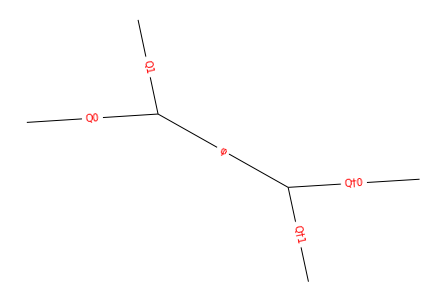

In [8]:
COMPLETIONS["Oqq"][8][0].completions[0].draw_diagram()

In [9]:
COMPLETIONS["Oqq"][8][0].completions[0].terms[1]

φ(C_0, I_0, I_1)*Q(U_0, C_1, I_2, g21_)*Q(U_1, C_2, I_3, g19_)*metric(-U_0, -U_1)*metric(-I_3, -I_0)*metric(-I_2, -I_1)*Eps(-C_1, -C_2, -C_0)

## Matching onto the Warsaw basis

If one is only interested in finding new models, then the results of this notebook until here are sufficient. Below we show how to match our overcomplete set of operators at dimension six onto the Warsaw basis. In doing so, we reconstruct the dictionary of completions.

Throughout this section we often suppress flavour indices.

In [10]:
UV_DICT = defaultdict(set)

We will make extensive use of the following identities

\begin{align}
&[\sigma_\mu]_{\alpha \dot{\alpha}} [\sigma^\mu]_{\beta \dot{\beta}} = 2 \epsilon_{\alpha \beta} \epsilon_{\dot{\alpha} \dot{\beta}} \\
&[\tau^I]_i^j [\tau^I]_k^l = 2 \delta_i^l \delta_k^j - \delta_i^j \delta_k^l \\
&[\lambda^A]^a_b [\lambda^A]^c_d = 2 \delta^a_d \delta^c_b - \tfrac{2}{3} \delta^a_b \delta^c_d = \tfrac{4}{3} \delta^a_d \delta^c_b - \tfrac{2}{3} \epsilon_{bde} \epsilon^{ace} \\
&\epsilon_{i j} \epsilon_{kl} + \epsilon_{ik} \epsilon_{lj} + \epsilon_{il}\epsilon_{jk} = 0
\end{align}

as well as the flavour symmetries of the couplings of the exotic fields to SM fermions.

### $\mathcal{O}_{ll}$

In this case there is only one operator, so all fields need to generate it.

In [11]:
UV_DICT["Oll"] = set(get_completions("Oll"))
UV_DICT["Oll"]

{'S(1, 1, 1)(0)', 'S(1, 3, 1)(0)'}

### $\mathcal{O}_{qq}$

Here there are two operators:
\begin{align}
    \mathcal{O}_{qq}^{(1)} &= (Q^{ai}_r \sigma_\mu Q^{\dagger}_{sai})(Q^{bj}_t \sigma^\mu Q^{\dagger}_{ubj}) \\
    \mathcal{O}_{qq}^{(3)} &= (Q^{ai}_r \sigma_\mu [\tau^I]_i^j Q^{\dagger}_{saj})(Q^{bk}_t \sigma^\mu [\tau^I]_k^l Q^\dagger_{ubl})
\end{align}

After Fierz transformations, these become:
\begin{align}
    \mathcal{O}_{qq}^{(1)} &= 2(Q^{ai}_r Q^{bj}_t)(Q^\dagger_{sai} Q^\dagger_{ubj}) \\
    \mathcal{O}_{qq}^{(3)} &= 4(Q^{ai}_r Q^{bk}_t)(Q^\dagger_{saj} Q^\dagger_{ubl}) \delta_i^l \delta_k^j - 2(Q^{ai}_r Q^{bk}_t)(Q^\dagger_{saj} Q^\dagger_{ubl}) \delta_i^j \delta_k^l
\end{align}

The completions are

In [12]:
get_completions("Oqq")

{'S(6, 1, 1/3)(2)': ['Oqq_0', 'Oqq_1'],
 'S(3b, 1, 1/3)(2)': ['Oqq_2'],
 'S(6, 3, 1/3)(2)': ['Oqq_3', 'Oqq_4', 'Oqq_6', 'Oqq_7'],
 'S(3b, 3, 1/3)(2)': ['Oqq_5', 'Oqq_8']}

And, for reference, the operator structures we work with are

In [13]:
for i, op in enumerate(OPERATORS["Oqq"]):
    print(f"Oqq{i}")
    display(op)

Oqq0


Q†(d5_, -C_2, I_0, g13_)*Q(u8_, C_0, I_1, g14_)*Q†(d6_, -C_3, I_2, g15_)*Q(u9_, C_1, I_3, g16_)*metric(-I_0, -I_2)*metric(-I_3, -I_1)*KD(C_2, -C_0)*KD(C_3, -C_1)

Oqq1


Q†(d5_, -C_2, I_0, g13_)*Q(u8_, C_0, I_1, g14_)*Q†(d6_, -C_3, I_2, g15_)*Q(u9_, C_1, I_3, g16_)*metric(-I_0, -I_2)*metric(-I_3, -I_1)*KD(C_2, -C_1)*KD(C_3, -C_0)

Oqq2


Q†(d5_, -C_2, I_0, g13_)*Q(u8_, C_0, I_1, g14_)*Q†(d6_, -C_3, I_2, g15_)*Q(u9_, C_1, I_3, g16_)*metric(-I_0, -I_2)*metric(-I_3, -I_1)*Eps(C_2, C_3, C_4)*Eps(-C_1, -C_0, -C_4)

Oqq3


Q†(d5_, -C_2, I_0, g13_)*Q(u8_, C_0, I_1, g14_)*Q†(d6_, -C_3, I_2, g15_)*Q(u10_, C_1, I_3, g17_)*metric(-I_1, -I_2)*metric(-I_3, -I_0)*KD(C_2, -C_0)*KD(C_3, -C_1)

Oqq4


Q†(d5_, -C_2, I_0, g13_)*Q(u8_, C_0, I_1, g14_)*Q†(d6_, -C_3, I_2, g15_)*Q(u10_, C_1, I_3, g17_)*metric(-I_1, -I_2)*metric(-I_3, -I_0)*KD(C_2, -C_1)*KD(C_3, -C_0)

Oqq5


Q†(d5_, -C_2, I_0, g13_)*Q(u8_, C_0, I_1, g14_)*Q†(d6_, -C_3, I_2, g15_)*Q(u10_, C_1, I_3, g17_)*metric(-I_1, -I_2)*metric(-I_3, -I_0)*Eps(C_2, C_3, C_4)*Eps(-C_1, -C_0, -C_4)

Oqq6


Q†(d7_, -C_2, I_0, g18_)*Q(u11_, C_0, I_1, g19_)*Q†(d8_, -C_3, I_2, g20_)*Q(u12_, C_1, I_3, g21_)*metric(-I_1, -I_0)*metric(-I_3, -I_2)*KD(C_2, -C_0)*KD(C_3, -C_1)

Oqq7


Q†(d7_, -C_2, I_0, g18_)*Q(u11_, C_0, I_1, g19_)*Q†(d8_, -C_3, I_2, g20_)*Q(u12_, C_1, I_3, g21_)*metric(-I_1, -I_0)*metric(-I_3, -I_2)*KD(C_2, -C_1)*KD(C_3, -C_0)

Oqq8


Q†(d7_, -C_2, I_0, g18_)*Q(u11_, C_0, I_1, g19_)*Q†(d8_, -C_3, I_2, g20_)*Q(u12_, C_1, I_3, g21_)*metric(-I_1, -I_0)*metric(-I_3, -I_2)*Eps(C_2, C_3, C_4)*Eps(-C_1, -C_0, -C_4)

Breaking this down, $(\mathbf{6}, \mathbf{1}, \tfrac{1}{3})_S$ generates
\begin{align}
    &\mathcal{O}_{qq0} + \mathcal{O}_{qq1} \\
    &= (Q^{ai} Q^{bj} \epsilon_{ij})(Q^\dagger_{ck} Q^\dagger_{dl} \epsilon^{kl}) (\delta_a^c \delta_b^d + \delta_b^c \delta_a^d ) \\
    &= (Q^{ai} Q^{bj})(Q^\dagger_{ck} Q^\dagger_{dl}) (\delta_i^k \delta_j^l - \delta_i^l \delta_j^k) (\delta_a^c \delta_b^d + \delta_b^c \delta_a^d ) \\
    &= \tfrac{1}{2} \mathcal{O}_{qq}^{(1)} - \tfrac{1}{2} \mathcal{O}_{qq}^{(3)}
\end{align}

In [14]:
UV_DICT["Oqq1"].add('S(6, 1, 1/3)(2)')
UV_DICT["Oqq3"].add('S(6, 1, 1/3)(2)')

The $(\mathbf{6}, \mathbf{3}, \tfrac{1}{3})_S$ will generate

\begin{align}
    &\mathcal{O}_{qq3} + \mathcal{O}_{qq4} + \mathcal{O}_{qq6} + \mathcal{O}_{qq7} \\
    &= (\tilde{Q}^{i}_{a}  \tilde{Q}^{k}_{c}) (Q^{b j} Q^{d l}) (\delta^a_{b} \delta^c_{d} + \delta^c_{b} \delta^a_{d}) (\epsilon_{i l} \epsilon_{k j} + \epsilon_{i j} \epsilon_{k l} ) \\
    &= \tfrac{3}{2} \mathcal{O}_{qq}^{(1)} + \tfrac{1}{2} \mathcal{O}_{qq}^{(3)}
\end{align}

In [15]:
UV_DICT["Oqq1"].add('S(6, 3, 1/3)(2)')
UV_DICT["Oqq3"].add('S(6, 3, 1/3)(2)')

The $(\bar{\mathbf{3}}, \mathbf{1}, \tfrac{1}{3})_S$ generates
\begin{align}
    \mathcal{O}_{qq2} &= (Q^{\dagger}_{a i} Q^\dagger_{c k}) (Q^{b j} Q^{d l}) \epsilon^{a c e}  \epsilon_{b d e}  \epsilon^{i k} \epsilon_{j l} \\
    &= (Q^{b j} Q^{d l}) (Q^{\dagger}_{a i} Q^\dagger_{c k})(\delta_b^a \delta_d^c - \delta_b^c \delta_d^a) (\delta_j^i \delta_l^k - \delta_j^k \delta_l^i) \\
    &= \tfrac{1}{2} \mathcal{O}_{qq}^{(1)} - \tfrac{1}{2} \mathcal{O}_{qq}^{(3)}
\end{align}

In [16]:
UV_DICT["Oqq1"].add('S(3b, 1, 1/3)(2)')
UV_DICT["Oqq3"].add('S(3b, 1, 1/3)(2)')

The $(\bar{\mathbf{3}}, \mathbf{3}, \tfrac{1}{3})_S$ generates
\begin{align}
    \mathcal{O}_{qq5} + \mathcal{O}_{qq8} &= (Q^{b j} Q^{d l}) (Q^{\dagger}_{a i} Q^\dagger_{c k})(\delta_b^a \delta_d^c - \delta_b^c \delta_d^a) (\delta_j^i \delta_l^k + \delta_j^k \delta_l^i) \\
    &= \tfrac{3}{2} \mathcal{O}_{qq}^{(1)} + \tfrac{1}{2} \mathcal{O}_{qq}^{(3)}
\end{align}

### $\mathcal{O}_{lq}$

Here there are two operators:
\begin{align}
    \mathcal{O}_{lq}^{(1)} &= (L^{i}_r \sigma_\mu L^{\dagger}_{si})(Q^{aj}_t \sigma^\mu Q^{\dagger}_{uaj}) \\
    \mathcal{O}_{lq}^{(3)} &= (L^{i}_r \sigma_\mu [\tau^I]_i^j L^{\dagger}_{sj})(Q^{ak}_t \sigma^\mu [\tau^I]_k^l Q^\dagger_{ual})
\end{align}

After Fierz transformations, these become:
\begin{align}
    \mathcal{O}_{lq}^{(1)} &= 2(L^{i}_r Q^{aj}_t)(L^\dagger_{si} Q^\dagger_{uaj}) \\
    \mathcal{O}_{lq}^{(3)} &= 4(L^{i}_r Q^{ak}_t)(L^\dagger_{sj} Q^\dagger_{ual}) \delta_i^l \delta_k^j - 2(L^{i}_r Q^{ak}_t)(L^\dagger_{sj} Q^\dagger_{ual}) \delta_i^j \delta_k^l
\end{align}

The completions are

In [17]:
get_completions("Olq")

{'S(3b, 3, 1/3)(-1)': ['Olq_0', 'Olq_1'], 'S(3b, 1, 1/3)(-1)': ['Olq_2']}

In [18]:
for i, op in enumerate(OPERATORS["Olq"]):
    print(f"Olq{i}")
    display(op)

Olq0


L(u18_, I_0, g31_)*Q(u19_, C_0, I_1, g32_)*L†(d13_, I_2, g33_)*Q†(d14_, -C_1, I_3, g34_)*metric(-I_0, -I_2)*metric(-I_3, -I_1)*KD(C_1, -C_0)

Olq1


L(u18_, I_0, g31_)*Q(u19_, C_0, I_1, g32_)*L†(d13_, I_2, g33_)*Q†(d15_, -C_1, I_3, g35_)*metric(-I_1, -I_2)*metric(-I_3, -I_0)*KD(C_1, -C_0)

Olq2


L(u20_, I_0, g36_)*Q(u21_, C_0, I_1, g37_)*L†(d16_, I_2, g38_)*Q†(d17_, -C_1, I_3, g39_)*metric(-I_1, -I_0)*metric(-I_3, -I_2)*KD(C_1, -C_0)

The field $(\bar{\mathbf{3}}, \mathbf{3}, \tfrac{1}{3})$ generates

\begin{align*}
    \mathcal{O}_{lq0} + \mathcal{O}_{lq1} &= (L^{i} Q^{ak})(\tilde{L}^{j} \tilde{Q}_{a}^{l}) (\epsilon_{ij}\epsilon_{kl} + \epsilon_{il} \epsilon_{jk}) \\
    &= \tfrac{1}{2} \mathcal{O}_{lq}^{(1)} + \tfrac{1}{4} (\mathcal{O}_{lq}^{(1)} + \mathcal{O}_{lq}^{(3)}) \\
    &=  \tfrac{3}{4}\mathcal{O}_{lq}^{(1)} + \tfrac{1}{4} \mathcal{O}_{lq}^{(3)}
\end{align*}

In [19]:
UV_DICT["Olq1"].add('S(3b, 3, 1/3)(-1)')
UV_DICT["Olq3"].add('S(3b, 3, 1/3)(-1)')

The remaining field is $(\bar{\mathbf{3}}, \mathbf{1}, \tfrac{1}{3})$, which gives

\begin{align*}
    \mathcal{O}_{lq2} &= (L^{i} Q^{ak})(\tilde{L}^{j} \tilde{Q}_{a}^{l}) \epsilon_{ik} \epsilon_{jl} \\
    &= (L^{i} Q^{ak})(L^{\dagger}_j Q_{al}^{\dagger}) \epsilon_{ik} \epsilon^{jl} \\
    &= (L^{i} Q^{ak})(L^{\dagger}_j Q_{al}^{\dagger}) (\delta_i^j \delta_k^l - \delta_k^j \delta_i^l) \\
    &= \tfrac{1}{2} \mathcal{O}_{lq}^{(1)} - \tfrac{1}{2} \mathcal{O}_{lq}^{(3)}
\end{align*}

In [20]:
UV_DICT["Olq1"].add('S(3b, 1, 1/3)(-1)')
UV_DICT["Olq3"].add('S(3b, 1, 1/3)(-1)')

### $\mathcal{O}_{ud}$

There are two operators:
\begin{align}
    \mathcal{O}_{ud}^{(1)} &= (\bar{u}_{ra} \sigma_\mu \bar{u}^{\dagger b}_{s})(\bar{d}_{tc} \sigma^\mu \bar{d}^{\dagger d}_{u}) \\
    \mathcal{O}_{ud}^{(8)} &= (\bar{u}_{ra} \sigma_\mu [ \lambda^A ]^a_b \bar{u}^{\dagger b}_{s})(\bar{d}_{tc} \sigma^\mu [ \lambda^A ]^c_d \bar{d}^{\dagger d}_{u})
\end{align}

After Fierz transformations, these become:
\begin{align}
    \mathcal{O}_{ud}^{(1)} &= 2 (\bar{u}_{ra} \bar{d}_{tc}) (\bar{u}^{\dagger b}_{s} \bar{d}^{\dagger d}_{u}) \delta^a_b \delta^c_d \\
    \mathcal{O}_{ud}^{(8)} &= 4 (\bar{u}_{ra} \bar{d}_{tc}) (\bar{u}^{\dagger b}_{s} \bar{d}^{\dagger d}_{u}) \delta^a_d \delta^c_b - \tfrac{4}{3} (\bar{u}_{ra} \bar{d}_{tc}) (\bar{u}^{\dagger b}_{s} \bar{d}^{\dagger d}_{u}) \delta^a_b \delta^c_d
\end{align}

The completions are

In [71]:
get_completions("Oud", completions=COMPLETIONS)

{'S(6, 1, 1/3)(2)': ['Oud_0', 'Oud_1'], 'S(3b, 1, 1/3)(2)': ['Oud_2']}

In [22]:
for i, op in enumerate(OPERATORS["Oud"]):
    print(f"Oud{i}")
    display(op)

Oud0


ub(u32_, -C_2, g60_)*ub†(d28_, C_0, g61_)*db(u33_, -C_3, g62_)*db†(d29_, C_1, g63_)*KD(C_2, -C_0)*KD(C_3, -C_1)

Oud1


ub(u32_, -C_2, g60_)*ub†(d28_, C_0, g61_)*db(u33_, -C_3, g62_)*db†(d29_, C_1, g63_)*KD(C_2, -C_1)*KD(C_3, -C_0)

Oud2


ub(u32_, -C_2, g60_)*ub†(d28_, C_0, g61_)*db(u33_, -C_3, g62_)*db†(d29_, C_1, g63_)*Eps(C_2, C_3, C_4)*Eps(-C_1, -C_0, -C_4)

Starting with $(\mathbf{6}, \mathbf{1}, \tfrac{1}{3})$, we have

\begin{align*}
    \mathcal{O}_{ud0} + \mathcal{O}_{ud1} &= (\bar{u}_{ra} \bar{d}_{tc}) (\bar{u}^{\dagger b}_{s} \bar{d}^{\dagger d}_{u}) ( \delta^a_b \delta^c_d + \delta^a_d \delta^c_b ) \\
    &= \tfrac{1}{2} \mathcal{O}_{ud}^{(1)} + \tfrac{1}{4} \mathcal{O}_{ud}^{(8)} + \tfrac{1}{6} \mathcal{O}_{ud}^{(1)} \\
    &=  \tfrac{2}{3} \mathcal{O}_{ud}^{(1)} + \tfrac{1}{4} \mathcal{O}_{ud}^{(8)}
\end{align*}

In [23]:
UV_DICT["Oud1"].add('S(6, 1, 1/3)(2)')
UV_DICT["Oud8"].add('S(6, 1, 1/3)(2)')

For $(\bar{\mathbf{3}}, \mathbf{1}, \tfrac{1}{3})$, we have

\begin{align*}
    \mathcal{O}_{ud2} &= (\bar{u}_{ra} \bar{d}_{tc}) (\bar{u}^{\dagger b}_{s} \bar{d}^{\dagger d}_{u}) \epsilon_{bde} \epsilon^{ace} \\
    &= (\bar{u}_{ra} \bar{d}_{tc}) (\bar{u}^{\dagger b}_{s} \bar{d}^{\dagger d}_{u}) (\delta^a_b \delta^c_d - \delta^a_d \delta^c_b) \\
    &=  \tfrac{1}{2} \mathcal{O}_{ud}^{(1)} - ( \tfrac{1}{4}\mathcal{O}_{ud}^{(8)} + \tfrac{1}{6} \mathcal{O}_{ud}^{(1)} ) \\
    &= \tfrac{1}{3} \mathcal{O}_{ud}^{(1)} - \tfrac{1}{4} \mathcal{O}_{ud}^{(8)}
\end{align*}

In [24]:
UV_DICT["Oud1"].add('S(3b, 1, 1/3)(2)')
UV_DICT["Oud8"].add('S(3b, 1, 1/3)(2)')

### $\mathcal{O}_{e \phi}$

The operator
\begin{equation}
    \mathcal{O}_{e\phi} = (H^\dagger H) (L \bar{e} H^\dagger)
\end{equation}
is relevant here. There are a number of additional operators that need to be considered, since many can be related to this one by integration by parts and applications of the classical equations of motion. First there are operators of the kind
\begin{align}
    \mathcal{O}_{\phi \ell 10} &= (H^\dagger H) [L (\sigma \cdot D) L^\dagger] \\
    \mathcal{O}_{\phi \ell 2} + \mathcal{O}_{\phi \ell 6} &= (H^\dagger \tau^I H) [L \tau^I (\sigma \cdot D) L^\dagger] \\
    \mathcal{O}_{\phi e 2} &= (H^\dagger H) [\bar{e} (\sigma \cdot D) \bar{e}^\dagger] \\
    \mathcal{O}^\prime_{\phi D} &= (H^\dagger H) (H^\dagger \Box H)
\end{align}

The direct completions of $\mathcal{O}_{e\phi}$ are many, there is only one single-particle model. These are:

In [35]:
collect_models(operator_completions(EffectiveOperator("Oephi", OPERATORS["Oephi"][0])))

[Model(S(1, 2, 1/2)(0)),
 Model(S(1, 2, 1/2)(0) + S(1, 3, 1)(0)),
 Model(S(1, 2, 1/2)(0) + S(1, 3, 0)(0)),
 Model(S(1, 1, 0)(0) + S(1, 2, 1/2)(0)),
 Model(F(1, 2, 1/2)(0) + F(1, 3, 0)(0)),
 Model(F(1, 2, 1/2)(0) + F(1, 3, 1)(0)),
 Model(F(1, 1, 1)(0) + F(1, 2, 1/2)(0)),
 Model(F(1, 2, 3/2)(0) + F(1, 3, 1)(0)),
 Model(F(1, 1, 1)(0) + F(1, 2, 3/2)(0)),
 Model(F(1, 2, 3/2)(0) + S(1, 3, 1)(0)),
 Model(F(1, 2, 1/2)(0) + S(1, 3, 0)(0)),
 Model(F(1, 2, 1/2)(0) + S(1, 1, 0)(0)),
 Model(F(1, 3, 1)(0) + S(1, 3, 0)(0)),
 Model(F(1, 1, 1)(0) + S(1, 1, 0)(0)),
 Model(F(1, 3, 0)(0) + S(1, 3, 1)(0))]

For the others we have written the oeprators above in our numbering scheme. We have:

In [31]:
collect_models(operator_completions(EffectiveOperator("Ophil-10", DERIV_OPERATORS["Ophil"][10])))

[Model(F(1, 3, 0)(0)), Model(F(1, 3, 1)(0))]

In [29]:
collect_models(operator_completions(EffectiveOperator("Ophil-2", DERIV_OPERATORS["Ophil"][2])))

[Model(F(1, 1, 1)(0)), Model(F(1, 3, 0)(0))]

In [30]:
collect_models(operator_completions(EffectiveOperator("Ophil-6", DERIV_OPERATORS["Ophil"][6])))

[Model(F(1, 3, 1)(0)), Model(F(1, 1, 0)(0))]

In [39]:
collect_models(operator_completions(EffectiveOperator("Ophie-2", DERIV_OPERATORS["Ophie"][2])))

[Model(F(1, 2, 3/2)(0)), Model(F(1, 2, 1/2)(0))]

For the operator labelled $\mathcal{O}^{\prime}_{\phi D}$ we need to be more careful with the completions. The appropriate models are discussed in section 2.2 of the paper. Of the structures $\mathcal{O}^{(i)}_{H^2 D^2}$ presented there, only the completions of $\mathcal{O}^{(2)}_{H^2 D^2}$ are not relevant, since this is exactly the operator $\mathcal{O}_{\phi \Box}$ in the Warsaw basis. All of the other operators listed have some component that contributes to the $\mathcal{O}_{e\phi}$ coefficient, and so the appropriate completions are

In [60]:
(collect_models(operator_completions(EffectiveOperator("OphiD-prime", DERIV_OPERATORS["OphiD"][0]))) 
 + collect_models(operator_completions(EffectiveOperator("OphiD-prime", DERIV_OPERATORS["OphiD"][2]))))

[Model(S(1, 3, 1)(0)), Model(S(1, 3, 0)(0))]

Because there are many models, we won't write down the matching expression onto the Warsaw basis, but the list of fields here matches those given in the literature for the completions of the operator $\mathcal{O}_{e\phi}$.